In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Information

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

# load the dataset

In [4]:
dataset = pd.read_csv("IRIS.csv")
dataset.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# data preprocessing

In [9]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# data analysis

In [10]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
dataset["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# data visualization

<Axes: xlabel='sepal_length', ylabel='Count'>

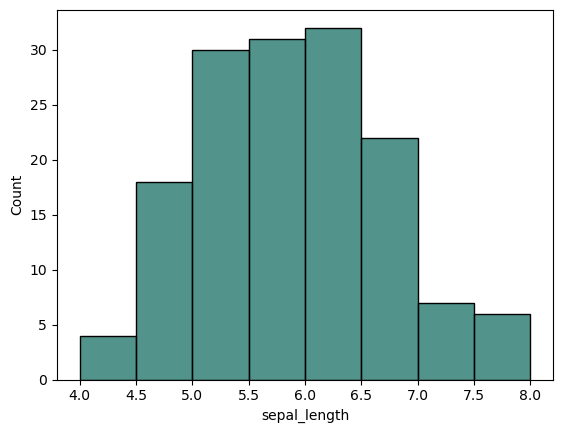

In [46]:
sns.histplot(dataset["sepal_length"] ,bins=[4,4.5,5,5.5,6,6.5,7,7.5,8] , color="#186F65" )

<Axes: xlabel='sepal_width', ylabel='Count'>

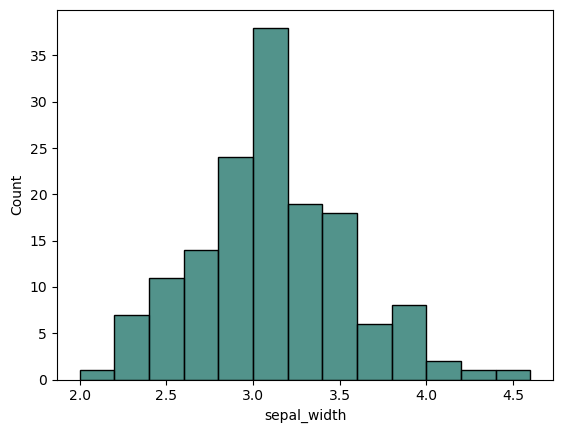

In [47]:
sns.histplot(dataset["sepal_width"] ,bins=[2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6] , color="#186F65"  )

<Axes: xlabel='petal_length', ylabel='Count'>

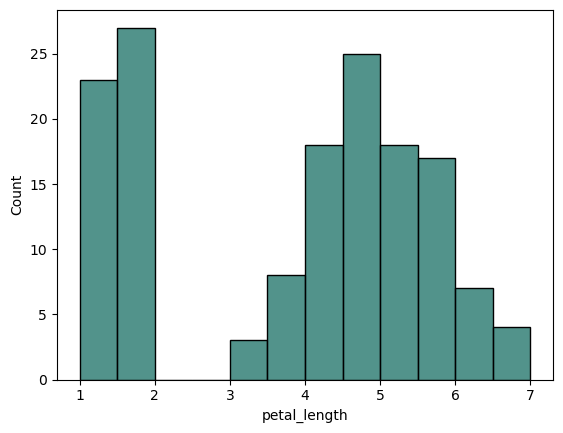

In [54]:
sns.histplot(dataset["petal_length"] ,bins=[1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,], color="#186F65" )

<Axes: xlabel='petal_width', ylabel='Count'>

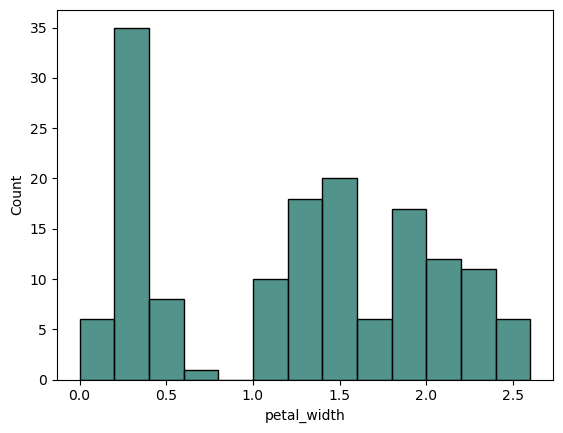

In [52]:
sns.histplot(dataset["petal_width"] ,bins=[0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6], color="#186F65" )

# correlation matrix

In [59]:
dataset.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

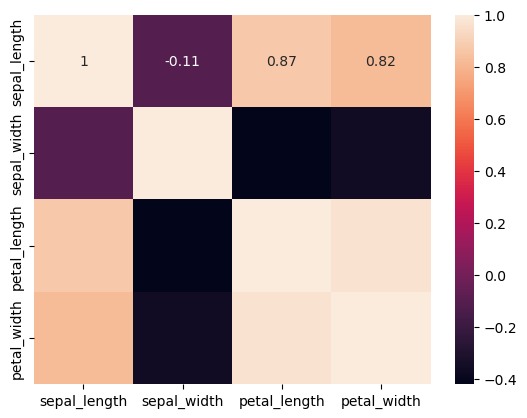

In [81]:
sns.heatmap(dataset.corr(numeric_only=True),annot = True )

# Label Encoder

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
dataset['species'] = le.fit_transform(dataset['species'])
dataset.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# splitting the data

In [96]:
from sklearn.model_selection import train_test_split

input_data = dataset.drop(columns=['species'])
output_data = dataset['species']
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.30 , random_state=42)

# training the model

In [99]:
from sklearn.metrics import accuracy_score

In [114]:
from sklearn.linear_model import LogisticRegression
logis_model = LogisticRegression()

In [115]:
logis_model.fit(x_train, y_train)

LogisticRegression()

In [116]:
logis_model.score(x_train, y_train) * 100 , logis_model.score(x_test, y_test) * 100 

(96.19047619047619, 100.0)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [108]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [113]:
knn_model.score(x_train, y_train) * 100 , knn_model.score(x_test, y_test) * 100 

(95.23809523809523, 100.0)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [120]:
dt_model.fit(x_train, y_train)


DecisionTreeClassifier()

In [121]:
dt_model.score(x_train, y_train) * 100 , dt_model.score(x_test, y_test) * 100 

(100.0, 100.0)